In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.cluster import homogeneity_score, completeness_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from kneed import KneeLocator
%matplotlib inline

In [2]:
path = "/Users/adriannapinzariu/Desktop/LIDC_newMode_2022 (1).csv"

In [3]:
df = pd.read_csv(path)

In [4]:
# Drop non-numeric columns
df = df.select_dtypes(include=['float', 'int'])

# Drop rows with NaN values
df = df.dropna()

In [5]:
# use DataFrame.loc[] method to filter the columns
sortByDf = df.loc[:, ['Malignancy', 'Spiculation']]

# print the resulting dataframe
print(sortByDf)

      Malignancy  Spiculation
0              5            5
1              5            1
2              5            2
3              4            2
4              4            1
...          ...          ...
2682           4            2
2683           2            1
2684           2            1
2685           5            2
2686           2            1

[2622 rows x 2 columns]


In [6]:
df = df.drop(['RadiologistID', 'Subtlety_1', 'InternalStructure_1', 'Sphericity_1', 'Margin_1', 'Lobulation_1', 'Spiculation_1', 'Texture_1', 'Malignancy_1', 'Subtlety_2', 'InternalStructure_2', 'Sphericity_2', 'Margin_2', 'Lobulation_2', 'Spiculation_2', 'Texture_2', 'Malignancy_2', 'Subtlety_3', 'InternalStructure_3', 'Sphericity_3', 'Margin_3', 'Lobulation_3', 'Spiculation_3', 'Texture_3', 'Malignancy_3', 'Subtlety_4', 'InternalStructure_4', 'Sphericity_4', 'Margin_4', 'Lobulation_4', 'Spiculation_4', 'Texture_4', 'Malignancy_4', 'Subtlety', 'InternalStructure', 'Sphericity', 'Margin', 'Lobulation', 'Spiculation', 'Texture'], axis=1)

In [7]:
df = df.drop(['Calcification_1', 'Calcification_2', 'Calcification_3', 'Calcification_4', 'Calcification'], axis = 1)

In [8]:
df = df.drop(['Malignancy', 'noduleID', 'InstanceID', 'imageZposition', 'PixelSpacing', 'PixelArea','SecondMoment', 'SuperscribedDiameter'], axis = 1)

In [9]:
df.columns

Index(['Area', 'ConvexArea', 'Perimeter', 'ConvexPerimeter', 'EquivDiameter',
       'MajorAxisLength', 'MinorAxisLength', 'Elongation', 'Compactness',
       'Eccentricity', 'Solidity', 'Extent', 'Circularity', 'RadialDistanceSD',
       'Roughness', 'MinIntensity', 'MaxIntensity', 'MeanIntensity',
       'SDIntensity', 'MinIntensityBG', 'MaxIntensityBG', 'MeanIntensityBG',
       'SDIntensityBG', 'IntensityDifference', 'markov1', 'markov2', 'markov3',
       'markov4', 'markov5', 'gabormean_0_0', 'gaborSD_0_0', 'gabormean_0_1',
       'gaborSD_0_1', 'gabormean_0_2', 'gaborSD_0_2', 'gabormean_1_0',
       'gaborSD_1_0', 'gabormean_1_1', 'gaborSD_1_1', 'gabormean_1_2',
       'gaborSD_1_2', 'gabormean_2_0', 'gaborSD_2_0', 'gabormean_2_1',
       'gaborSD_2_1', 'gabormean_2_2', 'gaborSD_2_2', 'gabormean_3_0',
       'gaborSD_3_0', 'gabormean_3_1', 'gaborSD_3_1', 'gabormean_3_2',
       'gaborSD_3_2', 'Contrast', 'Correlation', 'Energy', 'Homogeneity',
       'Entropy', 'x_3rdordermoment

In [10]:
df.head()

,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,Compactness,Eccentricity,...,Correlation,Energy,Homogeneity,Entropy,x_3rdordermoment,Inversevariance,Sumaverage,Variance,Clustertendency,MaxProbability
0,1094,1286,168.852814,135.372918,37.321898,42.803687,35.834900,1.194469,2.073908,0.546909,...,0.894,0.0003,0.0532,8.15,1290000,0.0223,661.0,143000,541000,0.0009
1,918,951,121.840620,116.923682,34.188213,42.015647,28.631957,1.467439,1.286861,0.731856,...,0.781,0.0005,0.0567,7.76,11100000,0.0221,260.0,32700,115000,0.0012
2,931,1062,148.267027,119.799290,34.429435,39.635819,30.844618,1.285016,1.879012,0.628016,...,0.899,0.0004,0.0572,8.03,735000,0.0247,416.0,111000,420000,0.0010
3,161,167,51.455844,49.201081,14.317527,18.125068,11.574663,1.565926,1.308681,0.769539,...,0.692,0.0027,0.0312,6.03,-469000,0.0107,420.0,98700,333000,0.0043
4,246,251,58.769553,57.721132,17.697936,18.324991,17.321312,1.057945,1.117274,0.326408,...,0.793,0.0018,0.0764,6.43,8600000,0.0392,565.0,137000,492000,0.0052


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
scaler=StandardScaler()
scaler.fit(df)
scaler_data=scaler.transform(df)

In [13]:
scaler_data

array([[ 2.96825716,  3.11302878,  3.38696964, ...,  0.17649608,
         0.32163175, -1.25984484],
       [ 2.39071677,  2.14352372,  2.04572419, ..., -0.56311557,
        -0.5542773 , -1.20480766],
       [ 2.433376  ,  2.46476271,  2.79966259, ..., -0.03807847,
         0.07284068, -1.24149912],
       ...,
       [-0.42479265, -0.43217627, -0.57327674, ..., -0.66369739,
        -0.69203765,  0.62976499],
       [ 0.5268364 ,  0.48234193,  0.73622372, ..., -0.02466756,
         0.06461618, -0.92962176],
       [-0.37228898, -0.3887656 , -0.4868477 , ..., -0.39212648,
        -0.37539447,  0.75818508]])

In [14]:
# Fit PCA with all components
pca_full = PCA(svd_solver='auto')
pca_full.fit(scaler_data)

PCA()

In [15]:
# Calculate the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

In [16]:
# Find the elbow point
kneedle = KneeLocator(range(1, len(cumulative_variance) + 1), cumulative_variance, S=1.0, curve='concave', direction='increasing')
elbow_point = kneedle.elbow
print(f"The elbow point is {elbow_point}.")

The elbow point is 14.


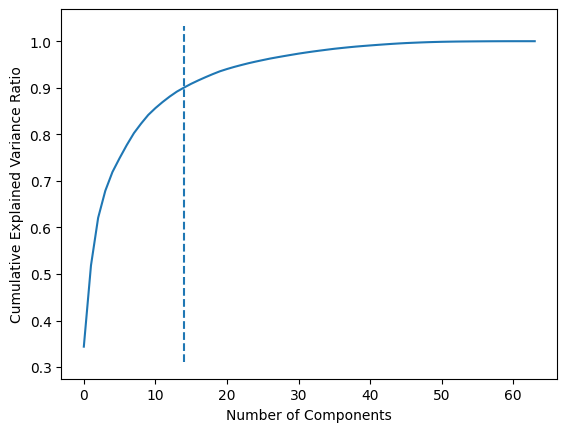

In [17]:
# Plot the explained variance ratio
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

plt.vlines(elbow_point, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()